In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# This command makes plots appear in the notebook
%matplotlib inline

In [11]:
df = pd.read_csv('for_ab_test.csv')
df

,grp,applies,read_applies,answered_applies
0,test,42,7,0
1,test,7,6,6
2,test,2,2,2
3,test,17,14,12
4,test,282,135,58
...,...,...,...,...
2790,control,8,8,3
2791,test,16,16,8
2792,test,5,1,0
2793,control,18,16,0


from matplotlib import pyplot as plt
df['applies'].plot(kind='hist', bins=20, title='applies')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['read_applies'].plot(kind='hist', bins=20, title='read_applies')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['answered_applies'].plot(kind='hist', bins=20, title='answered_applies')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('grp').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='applies', y='read_applies', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='read_applies', y='answered_applies', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['applies'].plot(kind='line', figsize=(8, 4), title='applies')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['read_applies'].plot(kind='line', figsize=(8, 4), title='read_applies')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['answered_applies'].plot(kind='line', figsize=(8, 4), title='answered_applies')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['grp'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='applies', y='grp', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['grp'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='read_applies', y='grp', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['grp'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='answered_applies', y='grp', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

/tmp/ipython-input-1417509848.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='applies', y='grp', inner='box', palette='Dark2')


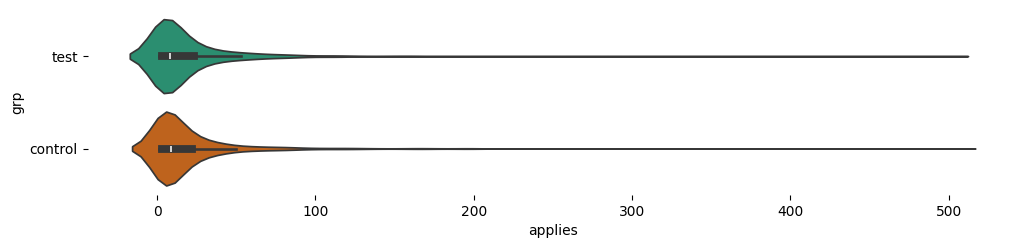

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['grp'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='applies', y='grp', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

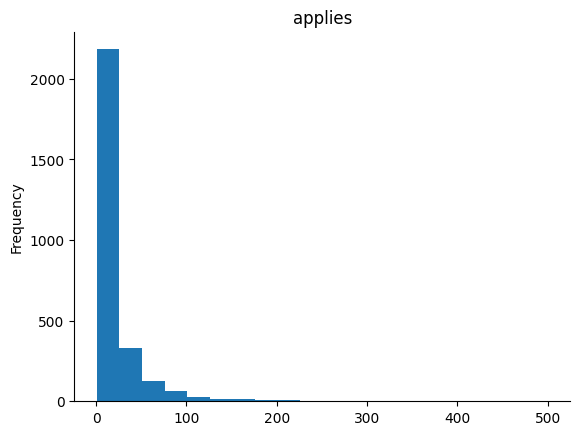

In [10]:
from matplotlib import pyplot as plt
df['applies'].plot(kind='hist', bins=20, title='applies')
plt.gca().spines[['top', 'right',]].set_visible(False)

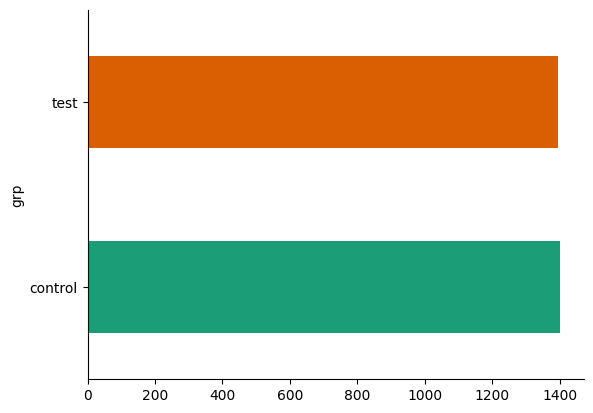

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('grp').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [13]:
df.describe()

,applies,read_applies,answered_applies
count,2795.000000,2795.000000,2795.000000
mean,20.744544,10.129517,5.292308
std,37.333786,21.084884,14.510162
min,1.000000,0.000000,0.000000
25%,3.000000,1.000000,0.000000
50%,9.000000,4.000000,1.000000
75%,22.000000,11.000000,4.000000
max,500.000000,482.000000,216.000000


In [14]:
df.groupby('grp').size()

,0
grp,
control,1400
test,1395


# Option One: AB test calculator

In [17]:
df.groupby('grp').sum()

,applies,read_applies,answered_applies
grp,,,
control,28331,13363,6920
test,29650,14949,7872


# Option Two: Bootstrap

In [18]:
df['read_pct'] = df['read_applies']/df['applies']
df['answered_pct'] = df['answered_applies']/df['applies']
# to avoid dividing by zero and getting NaN
df['read2answered'] = np.where(df['read_applies'] == 0, 0, df['answered_applies'] / df['read_applies'])

In [19]:
df.head()

,grp,applies,read_applies,answered_applies,read_pct,answered_pct,read2answered
0,test,42,7,0,0.166667,0.000000,0.000000
1,test,7,6,6,0.857143,0.857143,1.000000
2,test,2,2,2,1.000000,1.000000,1.000000
3,test,17,14,12,0.823529,0.705882,0.857143
4,test,282,135,58,0.478723,0.205674,0.429630


In [20]:
df.describe()

,applies,read_applies,answered_applies,read_pct,answered_pct,read2answered
count,2795.000000,2795.000000,2795.000000,2795.000000,2795.000000,2795.000000
mean,20.744544,10.129517,5.292308,0.559519,0.285025,0.377164
std,37.333786,21.084884,14.510162,0.395518,0.358466,0.412878
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,0.000000,0.142857,0.000000,0.000000
50%,9.000000,4.000000,1.000000,0.625000,0.078947,0.176471
75%,22.000000,11.000000,4.000000,1.000000,0.500000,0.833333
max,500.000000,482.000000,216.000000,1.000000,1.000000,1.000000


In [21]:
df.groupby('grp')[['read_pct', 'answered_pct', 'read2answered']].agg(['median', 'mean'])

read_pct          answered_pct           read2answered          
           median     mean       median      mean        median      mean
grp                                                                      
control  0.571429  0.53644     0.065942  0.270380      0.166667  0.367866
test     0.666667  0.58268     0.100000  0.299722      0.200000  0.386495

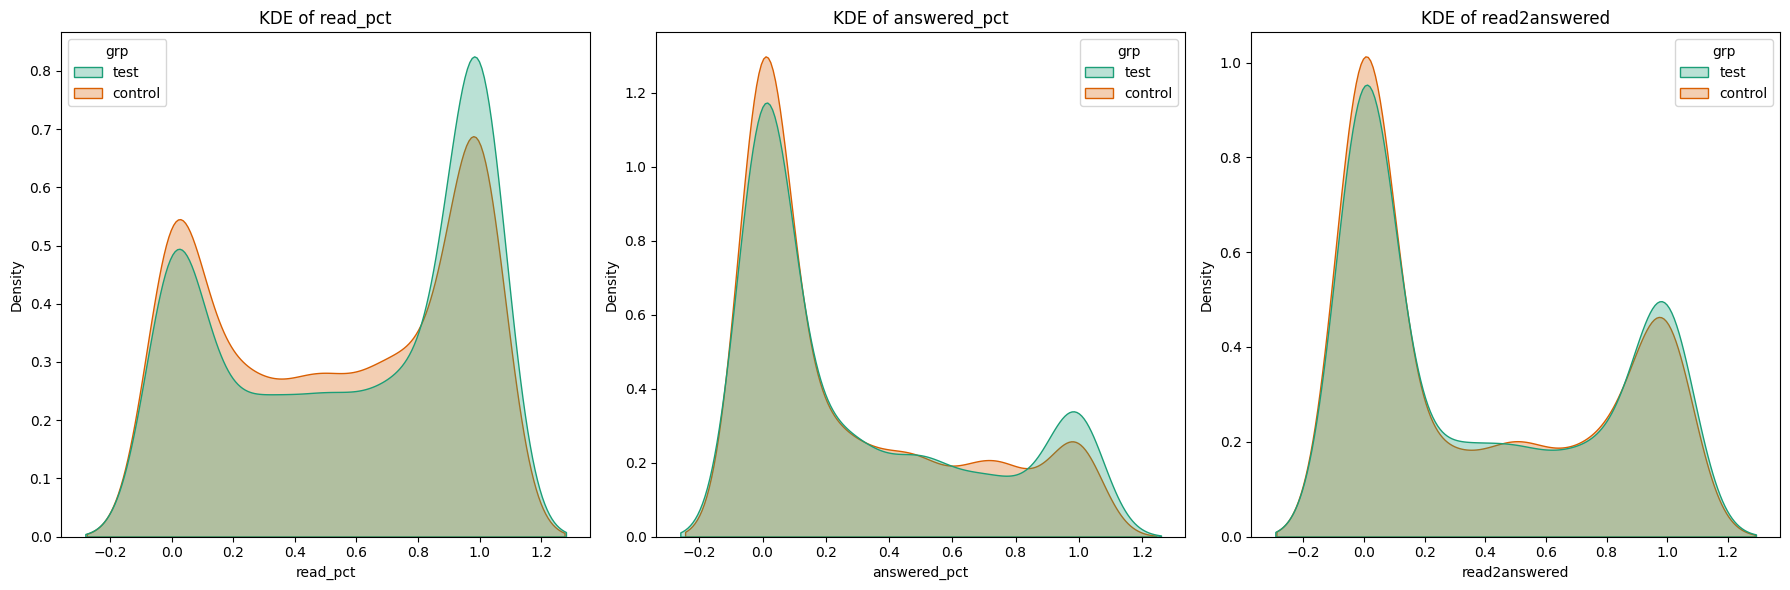

In [22]:
# Set the figure size
plt.figure(figsize=(18, 6))

# Plot read_pct KDE
plt.subplot(1, 3, 1)
sns.kdeplot(data=df, x='read_pct', hue='grp', palette='Dark2', fill=True, alpha=0.3)
plt.title('KDE of read_pct')

# Plot answered_pct KDE
plt.subplot(1, 3, 2)
sns.kdeplot(data=df, x='answered_pct', hue='grp', palette='Dark2', fill=True, alpha=0.3)
plt.title('KDE of answered_pct')

# Plot read2answered KDE
plt.subplot(1, 3, 3)
sns.kdeplot(data=df, x='read2answered', hue='grp', palette='Dark2', fill=True, alpha=0.3)
plt.title('KDE of read2answered')

# Display the plot
plt.tight_layout()
plt.show()

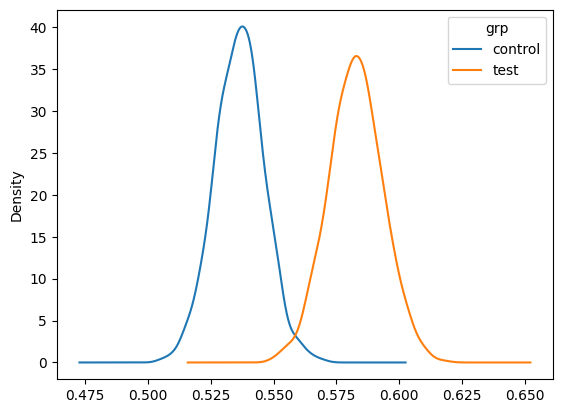

In [24]:
# Bootstrapped means of Read_pct
# Creating a list with bootstrapped means for each AB-group
boot_read_pct = []
for i in range(1000):
    boot_mean = df.sample(frac=1, replace=True).groupby('grp')['read_pct'].mean()
    boot_read_pct.append(boot_mean)

# Transforming the list to a DataFrame
boot_read_pct = pd.DataFrame(boot_read_pct)

# A Kernel Density Estimate plot of the bootstrap distributions
boot_read_pct.plot(kind = 'kde')
plt.show()

In [25]:
boot_read_pct.head()

grp,control,test
read_pct,0.550790,0.591415
read_pct,0.537984,0.578990
read_pct,0.542491,0.576437
read_pct,0.543989,0.585866
read_pct,0.539994,0.595853


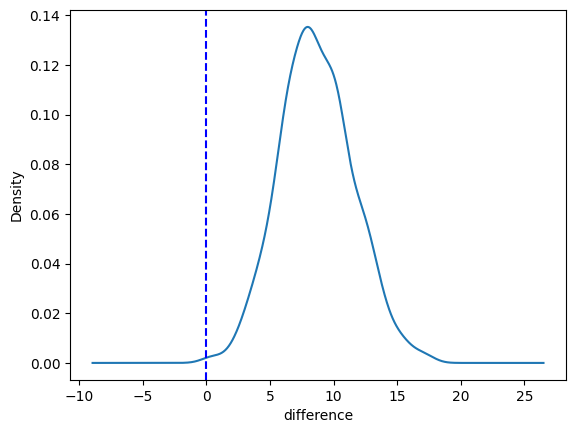

In [26]:
# Adding a column with the % difference between the two AB-groups
boot_read_pct['diff'] = (boot_read_pct['test']/boot_read_pct['control']-1)*100
#тест/контроль - 1 - на скільки відостків тест більше контроля

# Ploting the bootstrap % difference
ax = boot_read_pct['diff'].plot(kind = 'kde')
ax.set_xlabel('difference')
plt.axvline(0, color='blue', linestyle='--')
plt.show()

In [31]:
#Confidence Intervals
print (np.percentile(boot_read_pct['diff'], [2.5,97.5]))
# print(np.percentile(boot_read_pct['diff'], [0.5,99.5]))

[ 3.31783545 14.56374831]


#Bootstrap Function

In [32]:
def generate_bootstrap(data, group, metric, func, size=1000):
    boot = []
    for i in range(size):
        # Sample with replacement and group by the specified column
        sample = data.sample(frac=1, replace=True).groupby(group)[metric].agg(func)
        boot.append(sample)

    # Convert list of Series to DataFrame
    boot = pd.DataFrame(boot)
    return boot

def bootstrap_check(data, group, metric, func, size=1000):

    boot = generate_bootstrap(data, group, metric, func, size)

    # Calculate difference between 'test' and 'control'
    if 'test' in boot.columns and 'control' in boot.columns:
        boot['diff'] = (boot['test'] / boot['control'] - 1) * 100

        ci_diff = np.percentile(boot['diff'], [2.5, 97.5])
        ci_test = np.percentile(boot['test'], [2.5, 97.5])
        ci_control = np.percentile(boot['control'], [2.5, 97.5])

        print(f"Analyzing test results for {func} {metric}")
        print(f"95% Confidence interval for control: {ci_control}")
        print(f"95% Confidence interval for test: {ci_test}")
        print(f"95% Confidence interval for difference: {ci_diff}")

        boot['diff'].plot(kind='kde')
        plt.axvline(0, color='blue', linestyle='--')
        ax.set_xlabel('difference between test and control, in pct')
        plt.show()
    else:
        print("Columns 'test' and 'control' not found in the bootstrapped data.")

Analyzing test results for mean read_pct
95% Confidence interval for control: [0.51627858 0.5570921 ]
95% Confidence interval for test: [0.56232453 0.60499698]
95% Confidence interval for difference: [ 2.91767727 14.29934952]


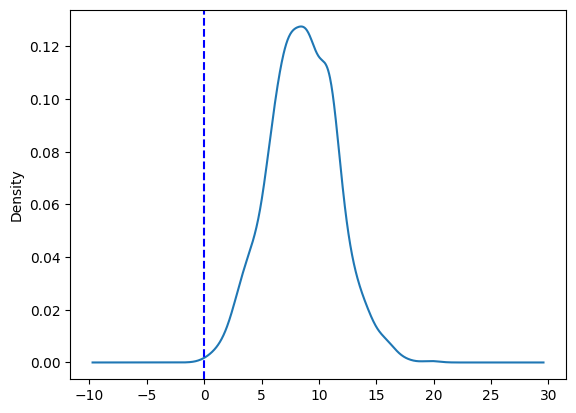

In [33]:
bootstrap_check(data=df, group='grp',metric = 'read_pct', func='mean')

Analyzing test results for mean answered_pct
95% Confidence interval for control: [0.25266065 0.28800824]
95% Confidence interval for test: [0.28041012 0.31793355]
95% Confidence interval for difference: [ 0.79073136 21.40632126]


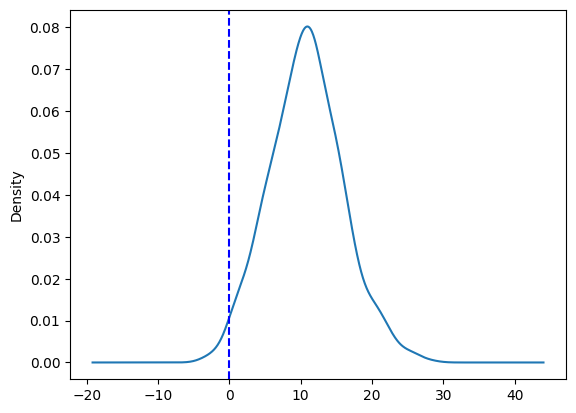

In [34]:
bootstrap_check(data=df, group='grp',metric = 'answered_pct', func='mean') # there is a difference

Analyzing test results for mean read2answered
95% Confidence interval for control: [0.34791596 0.38964928]
95% Confidence interval for test: [0.36638396 0.40846072]
95% Confidence interval for difference: [-3.02851938 13.76008742]


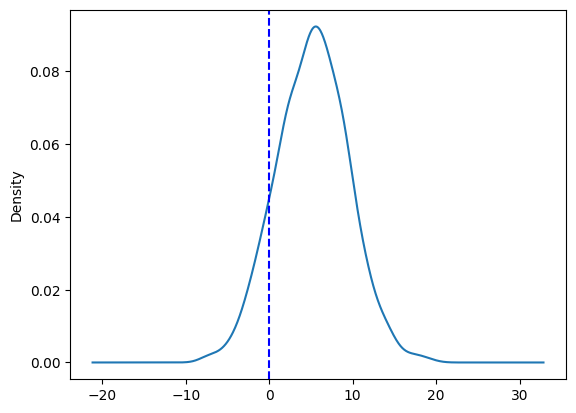

In [35]:
#bootstrap_check(data=df, group='grp',metric = 'read_pct', func='median') - there is a difference
#bootstrap_check(data=df, group='grp',metric = 'answered_pct', func='mean') - there is a difference
bootstrap_check(data=df, group='grp',metric = 'read2answered', func='mean')

#Option Three: Test

In [36]:
#check the stats for calculator
df.groupby('grp')['read_pct'].agg(['count', 'mean', 'std'])

,count,mean,std
grp,,,
control,1400,0.53644,0.391734
test,1395,0.58268,0.398076


In [55]:
# A/B Testing Function - Quick Solution
# didn't wrote this, found on kaggle
# https://www.kaggle.com/code/bokshalex/user-aggregated-data-a-b-test
from scipy import stats
from scipy.stats import shapiro

def AB_Test(dataframe, group, target):

    # Split A/B
    groupA = dataframe[dataframe[group] == "control"][target]
    groupB = dataframe[dataframe[group] == "test"][target]

    # Assumption: Normality
    ntA = shapiro(groupA)[1] < 0.05
    ntB = shapiro(groupB)[1] < 0.05
    # H0: Distribution is Normal! - False
    # H1: Distribution is not Normal! - True

    if (ntA == False) & (ntB == False): # "H0: Normal Distribution"
        # Parametric Test
        # Assumption: Homogeneity of variances
        leveneTest = stats.levene(groupA, groupB)[1] < 0.05
        # H0: Homogeneity: False
        # H1: Heterogeneous: True

        if leveneTest == False:
            # Homogeneity
            ttest = stats.ttest_ind(groupA, groupB, equal_var=True)[1]
            # H0: M1 == M2 - False
            # H1: M1 != M2 - True
        else:
            # Heterogeneous
            ttest = stats.ttest_ind(groupA, groupB, equal_var=False)[1]
            # H0: M1 == M2 - False
            # H1: M1 != M2 - True
    else:
        # Non-Parametric Test
        ttest = stats.mannwhitneyu(groupA, groupB)[1]
        # H0: M1 == M2 - False
        # H1: M1 != M2 - True

    # Result
    temp = pd.DataFrame({
        "AB Hypothesis":[ttest < 0.05],
        "p-value":[ttest]
    })
    temp["Test Type"] = np.where((ntA == False) & (ntB == False), "Parametric", "Non-Parametric")
    temp["AB Hypothesis"] = np.where(temp["AB Hypothesis"] == False, "Fail to Reject H0", "Reject H0")
    temp["Comment"] = np.where(temp["AB Hypothesis"] == "Fail to Reject H0", "A/B groups are similar!", "A/B groups are not similar!")

    # Columns
    if (ntA == False) & (ntB == False):
        temp["Homogeneity"] = np.where(leveneTest == False, "Yes", "No")
        temp = temp[["Test Type", "Homogeneity","AB Hypothesis", "p-value", "Comment"]]
    else:
        temp = temp[["Test Type","AB Hypothesis", "p-value", "Comment"]]

    # Print Hypothesis
    #print("# A/B Testing Hypothesis")
    #print("H0: A == B")
    #print("H1: A != B", "\n")

    return temp

In [56]:
# Apply A/B Testing
AB_Test(dataframe=df, group = "grp", target = "read_pct")

,Test Type,AB Hypothesis,p-value,Comment
0,Non-Parametric,Reject H0,0.001093,A/B groups are not similar!


In [57]:
df.columns.tolist()[1:]

['applies',
 'read_applies',
 'answered_applies',
 'read_pct',
 'answered_pct',
 'read2answered']

In [58]:
results = []
for target in df.columns.tolist()[1:]:
    result = AB_Test(dataframe=df, group = "grp", target = target)
    result["Target"] = target
    results.append(result)

final_result_df = pd.concat(results, ignore_index=True)
# Reorder columns to move the last column to the first position
final_result_df = final_result_df[[final_result_df.columns[-1]] + list(final_result_df.columns[:-1])]
final_result_df

,Target,Test Type,AB Hypothesis,p-value,Comment
0,applies,Non-Parametric,Fail to Reject H0,0.265015,A/B groups are similar!
1,read_applies,Non-Parametric,Fail to Reject H0,0.292187,A/B groups are similar!
2,answered_applies,Non-Parametric,Fail to Reject H0,0.270648,A/B groups are similar!
3,read_pct,Non-Parametric,Reject H0,0.001093,A/B groups are not similar!
4,answered_pct,Non-Parametric,Reject H0,0.044300,A/B groups are not similar!
5,read2answered,Non-Parametric,Fail to Reject H0,0.137958,A/B groups are similar!


#Grouping (last but not least)

In [59]:
#adding the grouping
df['popularity'] = pd.cut(
    df['applies'],
    bins=[0, 9, 24, float('inf')],
    labels=['1-9', '10-24', '25+']
)

In [61]:
df.head()

,grp,applies,read_applies,answered_applies,read_pct,answered_pct,read2answered,popularity
0,test,42,7,0,0.166667,0.000000,0.000000,25+
1,test,7,6,6,0.857143,0.857143,1.000000,1-9
2,test,2,2,2,1.000000,1.000000,1.000000,1-9
3,test,17,14,12,0.823529,0.705882,0.857143,10-24
4,test,282,135,58,0.478723,0.205674,0.429630,25+


In [62]:
def pivot_diff(value, func):
    pivot_df = df.pivot_table(
    index='popularity',        # Rows
    columns='grp',             # Columns
    values= value,  # Values to aggregate
    aggfunc= func, #Aggregation function
    observed=False, #adds zeros if there are no values
    ).fillna(0)

    column_totals = df.groupby('grp')[value].agg(func).reindex(pivot_df.columns).fillna(0).to_frame().T
    column_totals.index = [f'Total {value}, {func}']
    pivot_df = pd.concat([pivot_df, column_totals])

    pivot_df['diff_pct'] = (pivot_df['test']/pivot_df['control'] - 1)*100

    return pivot_df

In [63]:
pivot_diff('applies', 'count') # рахуємо скільки яких рекрутерів в кожній групі

grp,control,test,diff_pct
1-9,730,742,1.643836
10-24,358,330,-7.821229
25+,312,323,3.525641
"Total applies, count",1400,1395,-0.357143


In [64]:
# def the function for the chart
def ab_chart(a):
    a[['control', 'test']][:-1].plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
    plt.title(a.index[-1])
    plt.show()
    return a

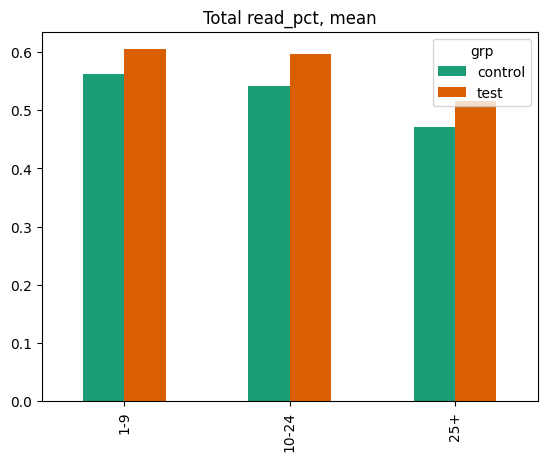

grp,control,test,diff_pct
1-9,0.561706,0.604868,7.683988
10-24,0.541927,0.597486,10.252241
25+,0.471029,0.516585,9.671408
"Total read_pct, mean",0.536440,0.582680,8.619790


In [65]:
ab_chart(pivot_diff('read_pct', 'mean'))
# ab_chart(pivot_diff('answered_pct', 'mean'))

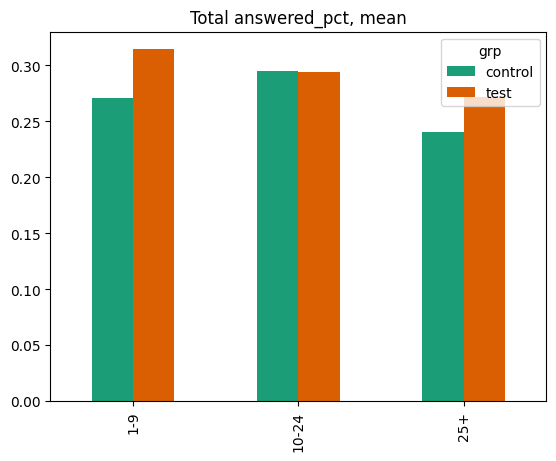

grp,control,test,diff_pct
1-9,0.271263,0.314480,15.931776
10-24,0.294938,0.293989,-0.321553
25+,0.240134,0.271676,13.135255
"Total answered_pct, mean",0.270380,0.299722,10.852255


In [66]:
ab_chart(pivot_diff('answered_pct', 'mean'))

In [67]:
#confidance intervals function for df instead of printing
def cis(data, group, metric, func, size=1000):

    boot = generate_bootstrap(data, group, metric, func, size)
    boot['diff'] = (boot['test'] / boot['control'] - 1) * 100
    ci_diff = np.percentile(boot['diff'], [5, 95])

    return ci_diff

In [68]:
#same about confidance intervals

r = []  # Initialize an empty list to store results

for part in df['popularity'].unique().tolist():
    for target in df.columns.tolist()[4:-1]:
        # Create a dictionary for each result
        result = {}
        result['Popularity'] = part
        result['Target'] = target

        # Calculate confidence intervals
        ci_diff = cis(data=df[df['popularity'] == part], group='grp', metric=target, func='mean', size=1000)

        # Store the results in the dictionary
        result['ci_lower'] = ci_diff[0]
        result['ci_upper'] = ci_diff[1]

        if (result['ci_lower'] < 0 < result['ci_upper']) or (result['ci_lower'] > 0 > result['ci_upper']):
            result['confidence'] = 'ci cross 0'
        else:
            result['confidence'] = '90 pct confidence'

        # Append the result dictionary to the list
        r.append(result)

# Convert the list of dictionaries to a DataFrame
final_result = pd.DataFrame(r)

In [69]:
final_result.sort_values(by=['Target', 'Popularity'])

,Popularity,Target,ci_lower,ci_upper,confidence
4,1-9,answered_pct,2.852184,30.261504,90 pct confidence
7,10-24,answered_pct,-13.311851,14.187306,ci cross 0
1,25+,answered_pct,-3.819837,33.389216,ci cross 0
5,1-9,read2answered,0.834085,23.123865,90 pct confidence
8,10-24,read2answered,-14.506352,7.896968,ci cross 0
2,25+,read2answered,-8.202709,18.568871,ci cross 0
3,1-9,read_pct,1.334100,14.669590,90 pct confidence
6,10-24,read_pct,2.093441,19.273289,90 pct confidence
0,25+,read_pct,-0.095991,20.216249,ci cross 0


In [70]:
#ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the model
model = ols('read_pct ~ C(grp) * C(popularity)', data=df).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                          sum_sq      df          F    PR(>F)
C(grp)                  1.526627     1.0   9.857668  0.001709
C(popularity)           3.642104     2.0  11.758815  0.000008
C(grp):C(popularity)    0.018292     2.0   0.059057  0.942654
Residual              431.923926  2789.0        NaN       NaN


In [71]:
# Check if 'popularity' effects answered_pct
model = ols('answered_pct ~ C(grp) * C(popularity)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                          sum_sq      df         F    PR(>F)
C(grp)                  0.616255     1.0  4.807738  0.028415
C(popularity)           0.699349     2.0  2.727999  0.065524
C(grp):C(popularity)    0.229068     2.0  0.893541  0.409321
Residual              357.493347  2789.0       NaN       NaN


In [72]:
# Check if 'popularity' effects read2answered
model = ols('read2answered ~ C(grp) * C(popularity)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                          sum_sq      df         F    PR(>F)
C(grp)                  0.265700     1.0  1.566376  0.210839
C(popularity)           2.629372     2.0  7.750459  0.000440
C(grp):C(popularity)    0.326961     2.0  0.963765  0.381581
Residual              473.089371  2789.0       NaN       NaN
